<a href="https://colab.research.google.com/github/shranith/ML-notebooks/blob/master/linear_regression_with_tfdbg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library, along with tensorflow debugger 




In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [0]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.089114100 W= 0.18833631 b= 1.2421466
Epoch: 0100 cost= 0.087719858 W= 0.19198006 b= 1.2159339
Epoch: 0150 cost= 0.086486578 W= 0.19540615 b= 1.1912872
Epoch: 0200 cost= 0.085395321 W= 0.19862844 b= 1.168106
Epoch: 0250 cost= 0.084429674 W= 0.2016593 b= 1.1463022
Epoch: 0300 cost= 0.083575241 W= 0.20450987 b= 1.1257957
Epoch: 0350 cost= 0.082819127 W= 0.20719096 b= 1.106508
Epoch: 0400 cost= 0.082150094 W= 0.20971256 b= 1.0883675
Epoch: 0450 cost= 0.081557952 W= 0.21208444 b= 1.0713044
Epoch: 0500 cost= 0.081034027 W= 0.2143152 b= 1.055257
Epoch: 0550 cost= 0.080570348 W= 0.21641323 b= 1.0401635
Epoch: 0600 cost= 0.080159985 W= 0.2183866 b= 1.0259671
Epoch: 0650 cost= 0.079796799 W= 0.22024274 b= 1.0126144
Epoch: 0700 cost= 0.079475395 W= 0.22198842 b= 1.0000557
Epoch: 0750 cost= 0.079190917 W= 0.22363037 b= 0.9882439
Epoch: 0800 cost= 0.078939147 W= 0.22517462 b= 0.97713464
Epoch: 0850 cost= 0.078716293 W= 0.22662708 b= 0.9666858
Epoch: 0900 cost= 0.078519069 W= 0.2

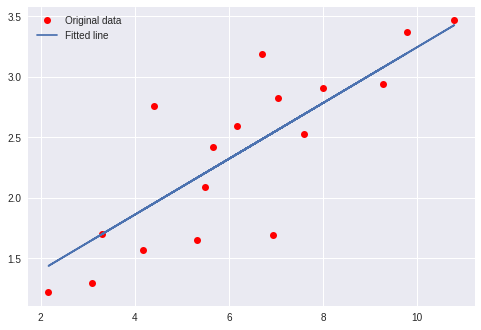

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [0]:
# Regression result